In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
data = pd.read_csv('bodyfat.csv')
data.head(10)

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
5,1.0502,20.9,24,210.25,74.75,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8
6,1.0549,19.2,26,181.00,69.75,36.4,105.1,90.7,100.3,58.4,38.3,22.9,31.9,27.8,17.7
7,1.0704,12.4,25,176.00,72.50,37.8,99.6,88.5,97.1,60.0,39.4,23.2,30.5,29.0,18.8
8,1.0900,4.1,25,191.00,74.00,38.1,100.9,82.5,99.9,62.9,38.3,23.8,35.9,31.1,18.2
9,1.0722,11.7,23,198.25,73.50,42.1,99.6,88.6,104.1,63.1,41.7,25.0,35.6,30.0,19.2


In [3]:
# Shape of data
print(data.shape)


(252, 15)


In [4]:
# Checking if there are any null values
data.isnull().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [6]:
data.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


In [7]:
# Checking for duplicates in the dataset
data.duplicated().sum()

0

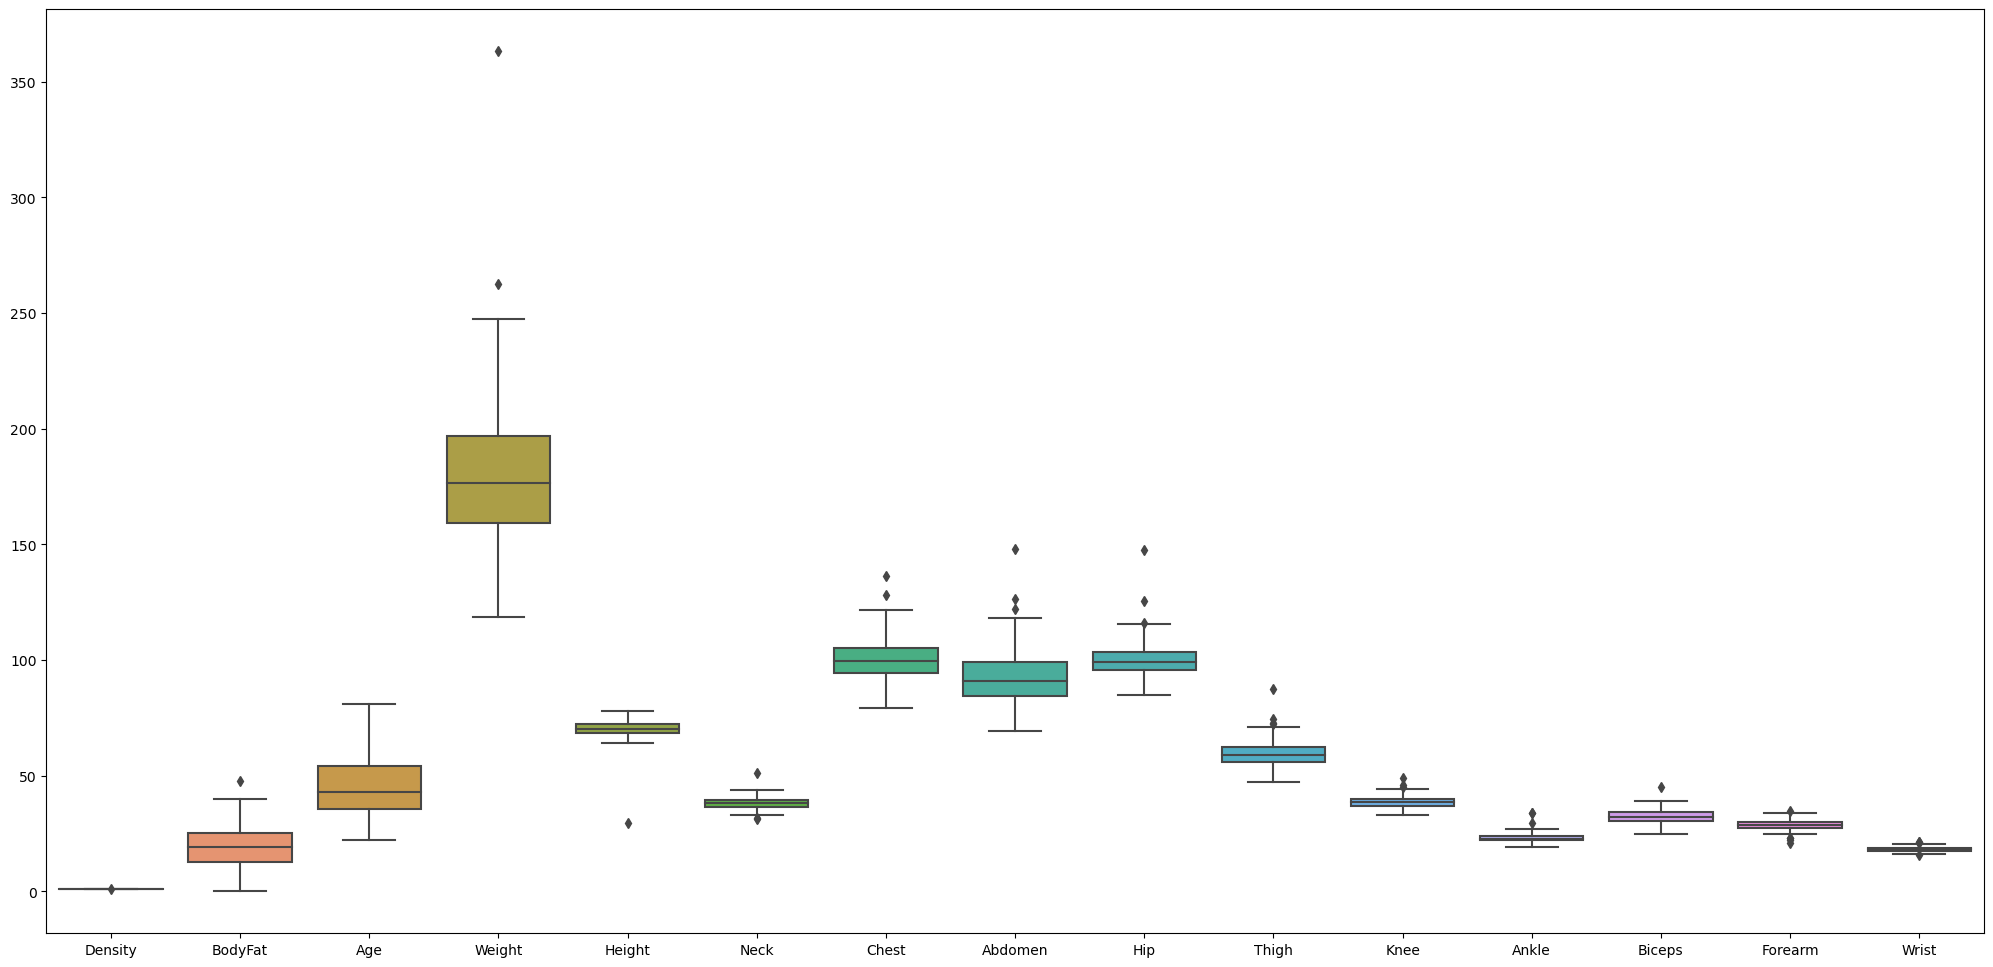

In [8]:
# Understanding the presence of outliers in the model for every attribute
plt.figure(figsize = (25,12))
sns.boxplot(data = data)
plt.show()

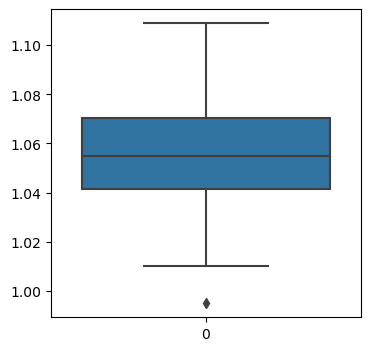

In [9]:
# Understanding the presence of outliers for the Density attribute separately
plt.figure(figsize = (4,4))
sns.boxplot(data = data['Density'])
plt.show()

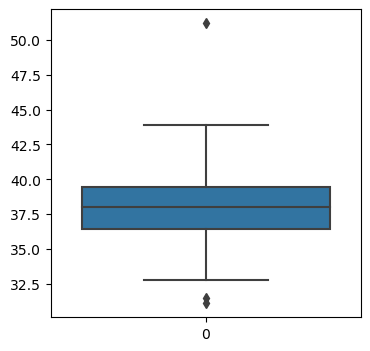

In [10]:
# Understanding the presence of outliers for the Neck attribute separately
plt.figure(figsize = (4,4))
sns.boxplot(data = data['Neck'])
plt.show()

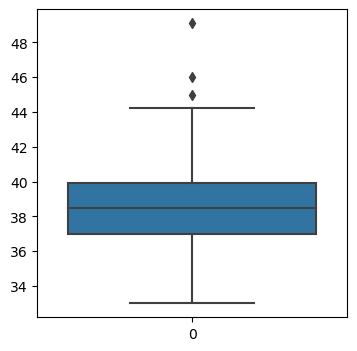

In [11]:
# Understanding the presence of outliers for the Knee attribute separately
plt.figure(figsize = (4,4))
sns.boxplot(data = data['Knee'])
plt.show()

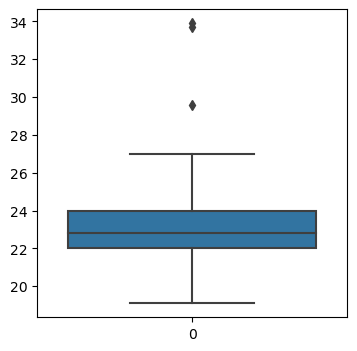

In [12]:
# Understanding the presence of outliers for the Ankle attribute separately
plt.figure(figsize = (4,4))
sns.boxplot(data = data['Ankle'])
plt.show()

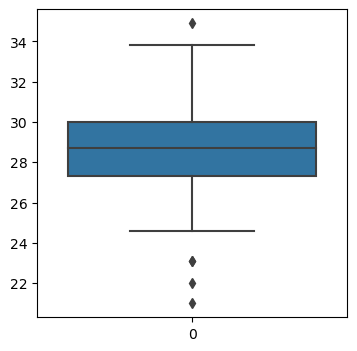

In [13]:
# Understanding the presence of outliers for the Forearm attribute separately
plt.figure(figsize = (4,4))
sns.boxplot(data = data['Forearm'])
plt.show()

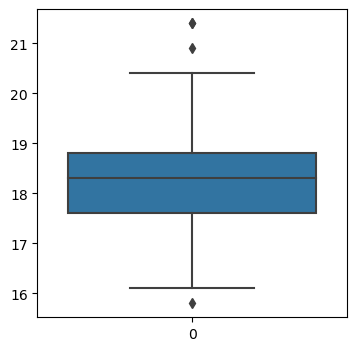

In [14]:
# Understanding the presence of outliers for the Wrist attribute separately
plt.figure(figsize = (4,4))
sns.boxplot(data = data['Wrist'])
plt.show()

In [15]:
# Removal of outliers
Quartile_1 = data.quantile(0.25)
Quartile_3 = data.quantile(0.75)
IQR = Quartile_3 - Quartile_1

data = data[~((data < (Quartile_1 - (1.5 * IQR))) | 
              (data > (Quartile_3 + (1.5 * IQR)))).any(axis = 1)]

data.head(10)

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
5,1.0502,20.9,24,210.25,74.75,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8
6,1.0549,19.2,26,181.00,69.75,36.4,105.1,90.7,100.3,58.4,38.3,22.9,31.9,27.8,17.7
7,1.0704,12.4,25,176.00,72.50,37.8,99.6,88.5,97.1,60.0,39.4,23.2,30.5,29.0,18.8
8,1.0900,4.1,25,191.00,74.00,38.1,100.9,82.5,99.9,62.9,38.3,23.8,35.9,31.1,18.2
9,1.0722,11.7,23,198.25,73.50,42.1,99.6,88.6,104.1,63.1,41.7,25.0,35.6,30.0,19.2


In [16]:
# Shape of new dataset without outliers
print(data.shape)

(234, 15)


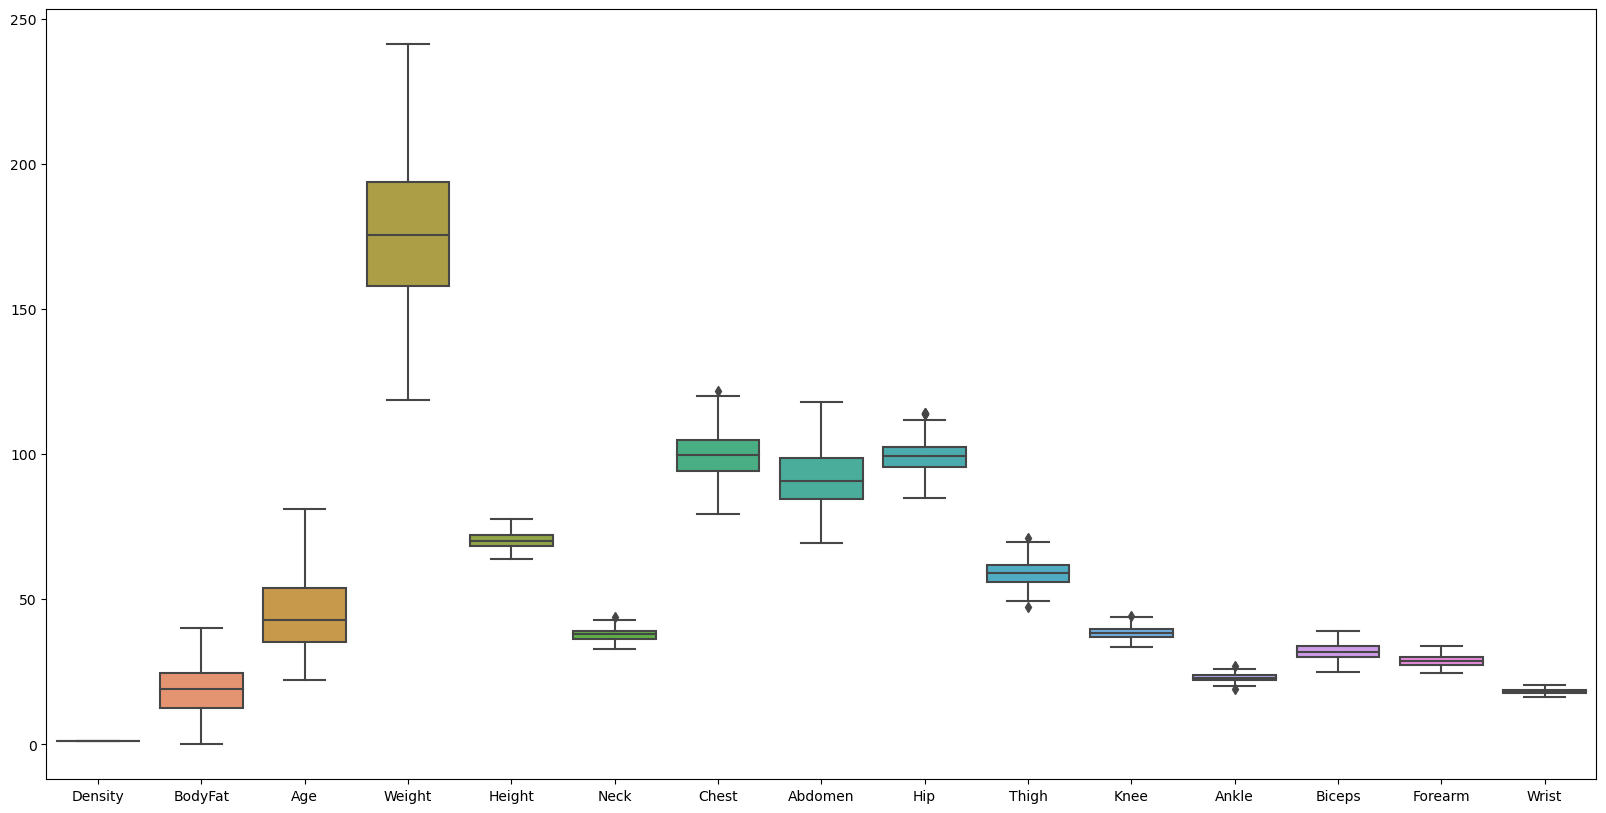

In [17]:
# Getting the new boxplots for all the attributes after ouliers removal

plt.figure(figsize = (20,10))
sns.boxplot(data = data)
plt.show()

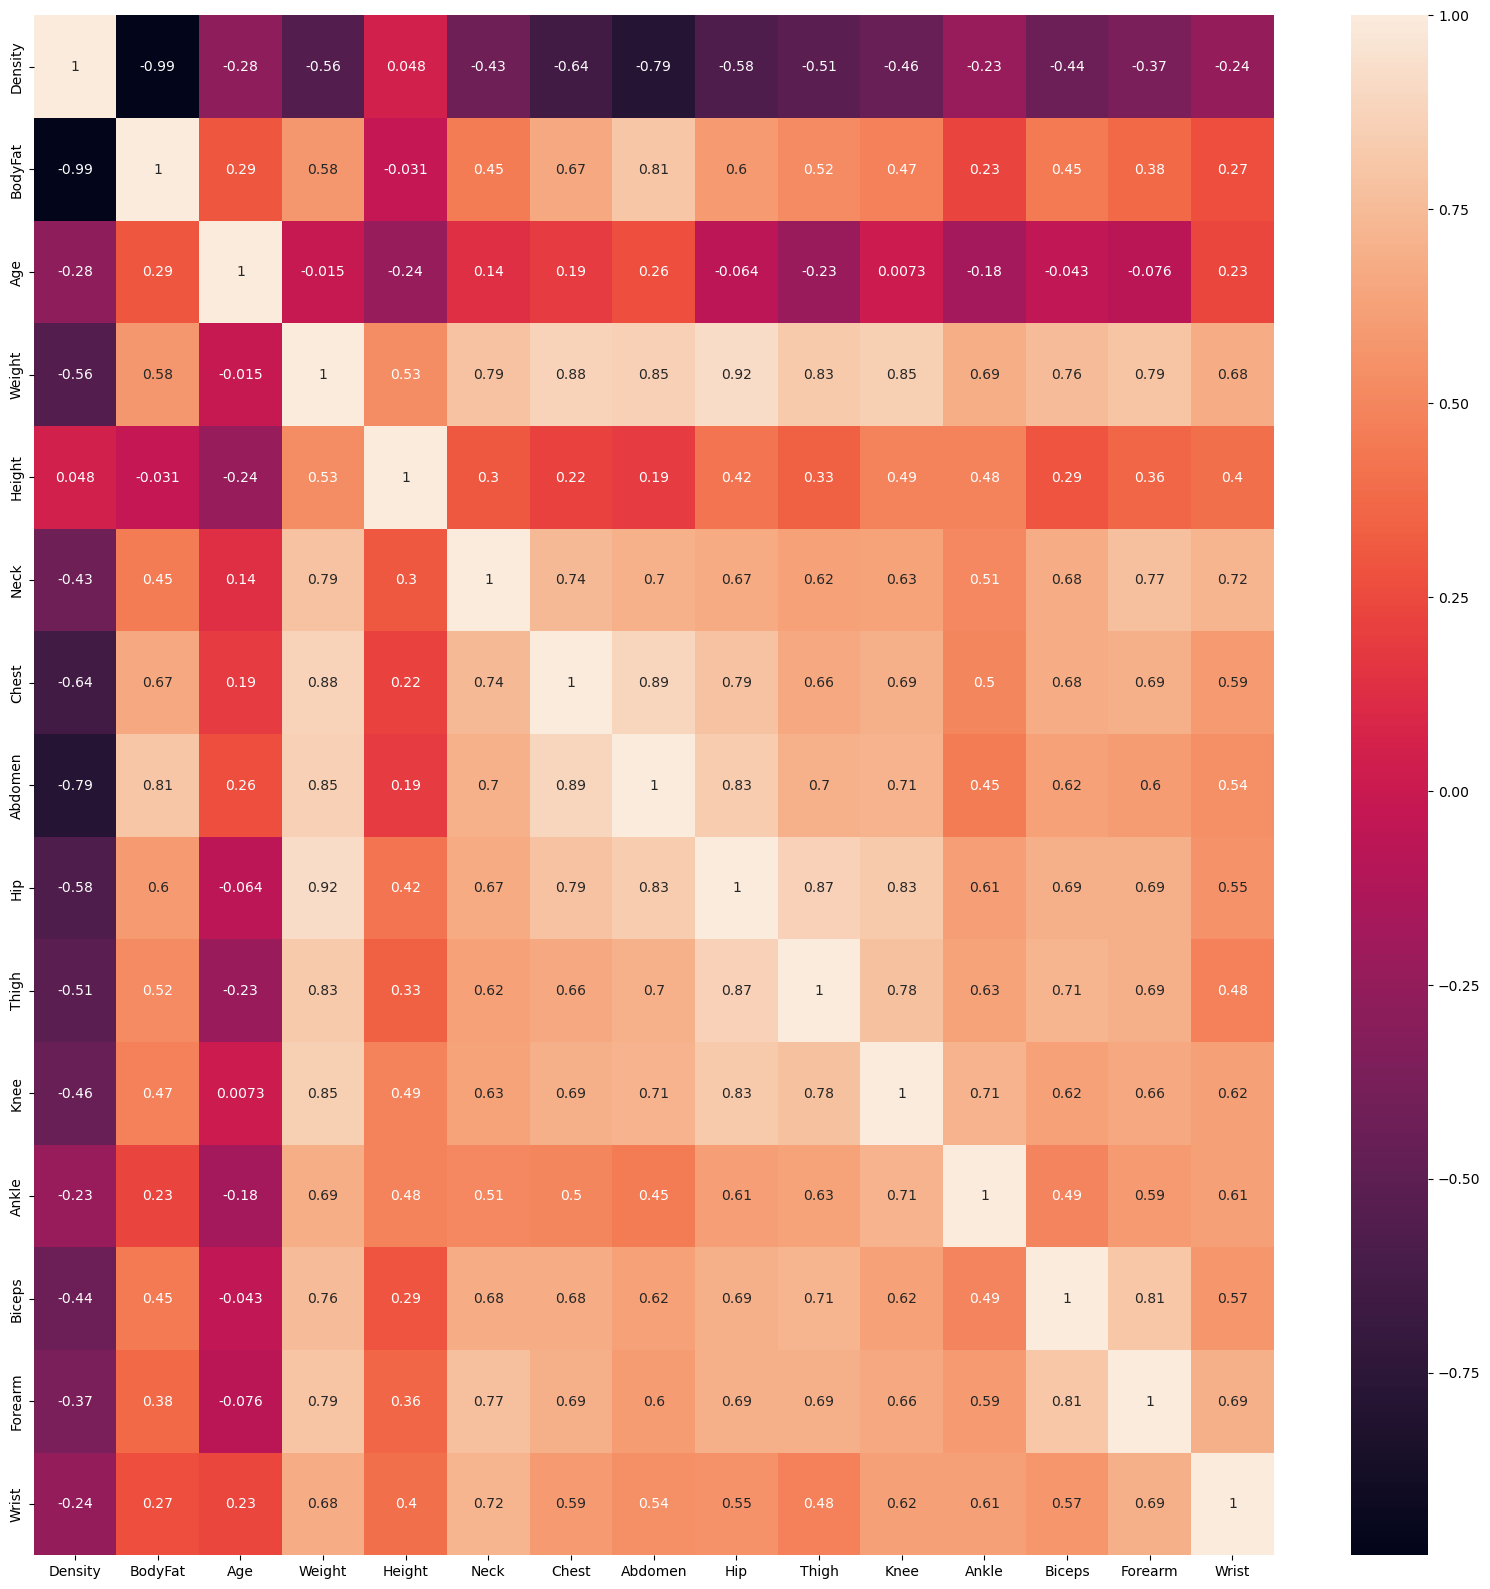

In [18]:
# We observe that after that removal of outliers from all the attributes
# there are still some data values for some attributes that are more than
# the maximum value but they are just slightly bigger so we aren't 
# considering them much of an outlier.

# Understanding the correlation between the attributes using HeatMap

plt.figure(figsize = (20, 20))
sns.heatmap(data.corr(), annot = True)
plt.show()

<Figure size 4000x4000 with 0 Axes>

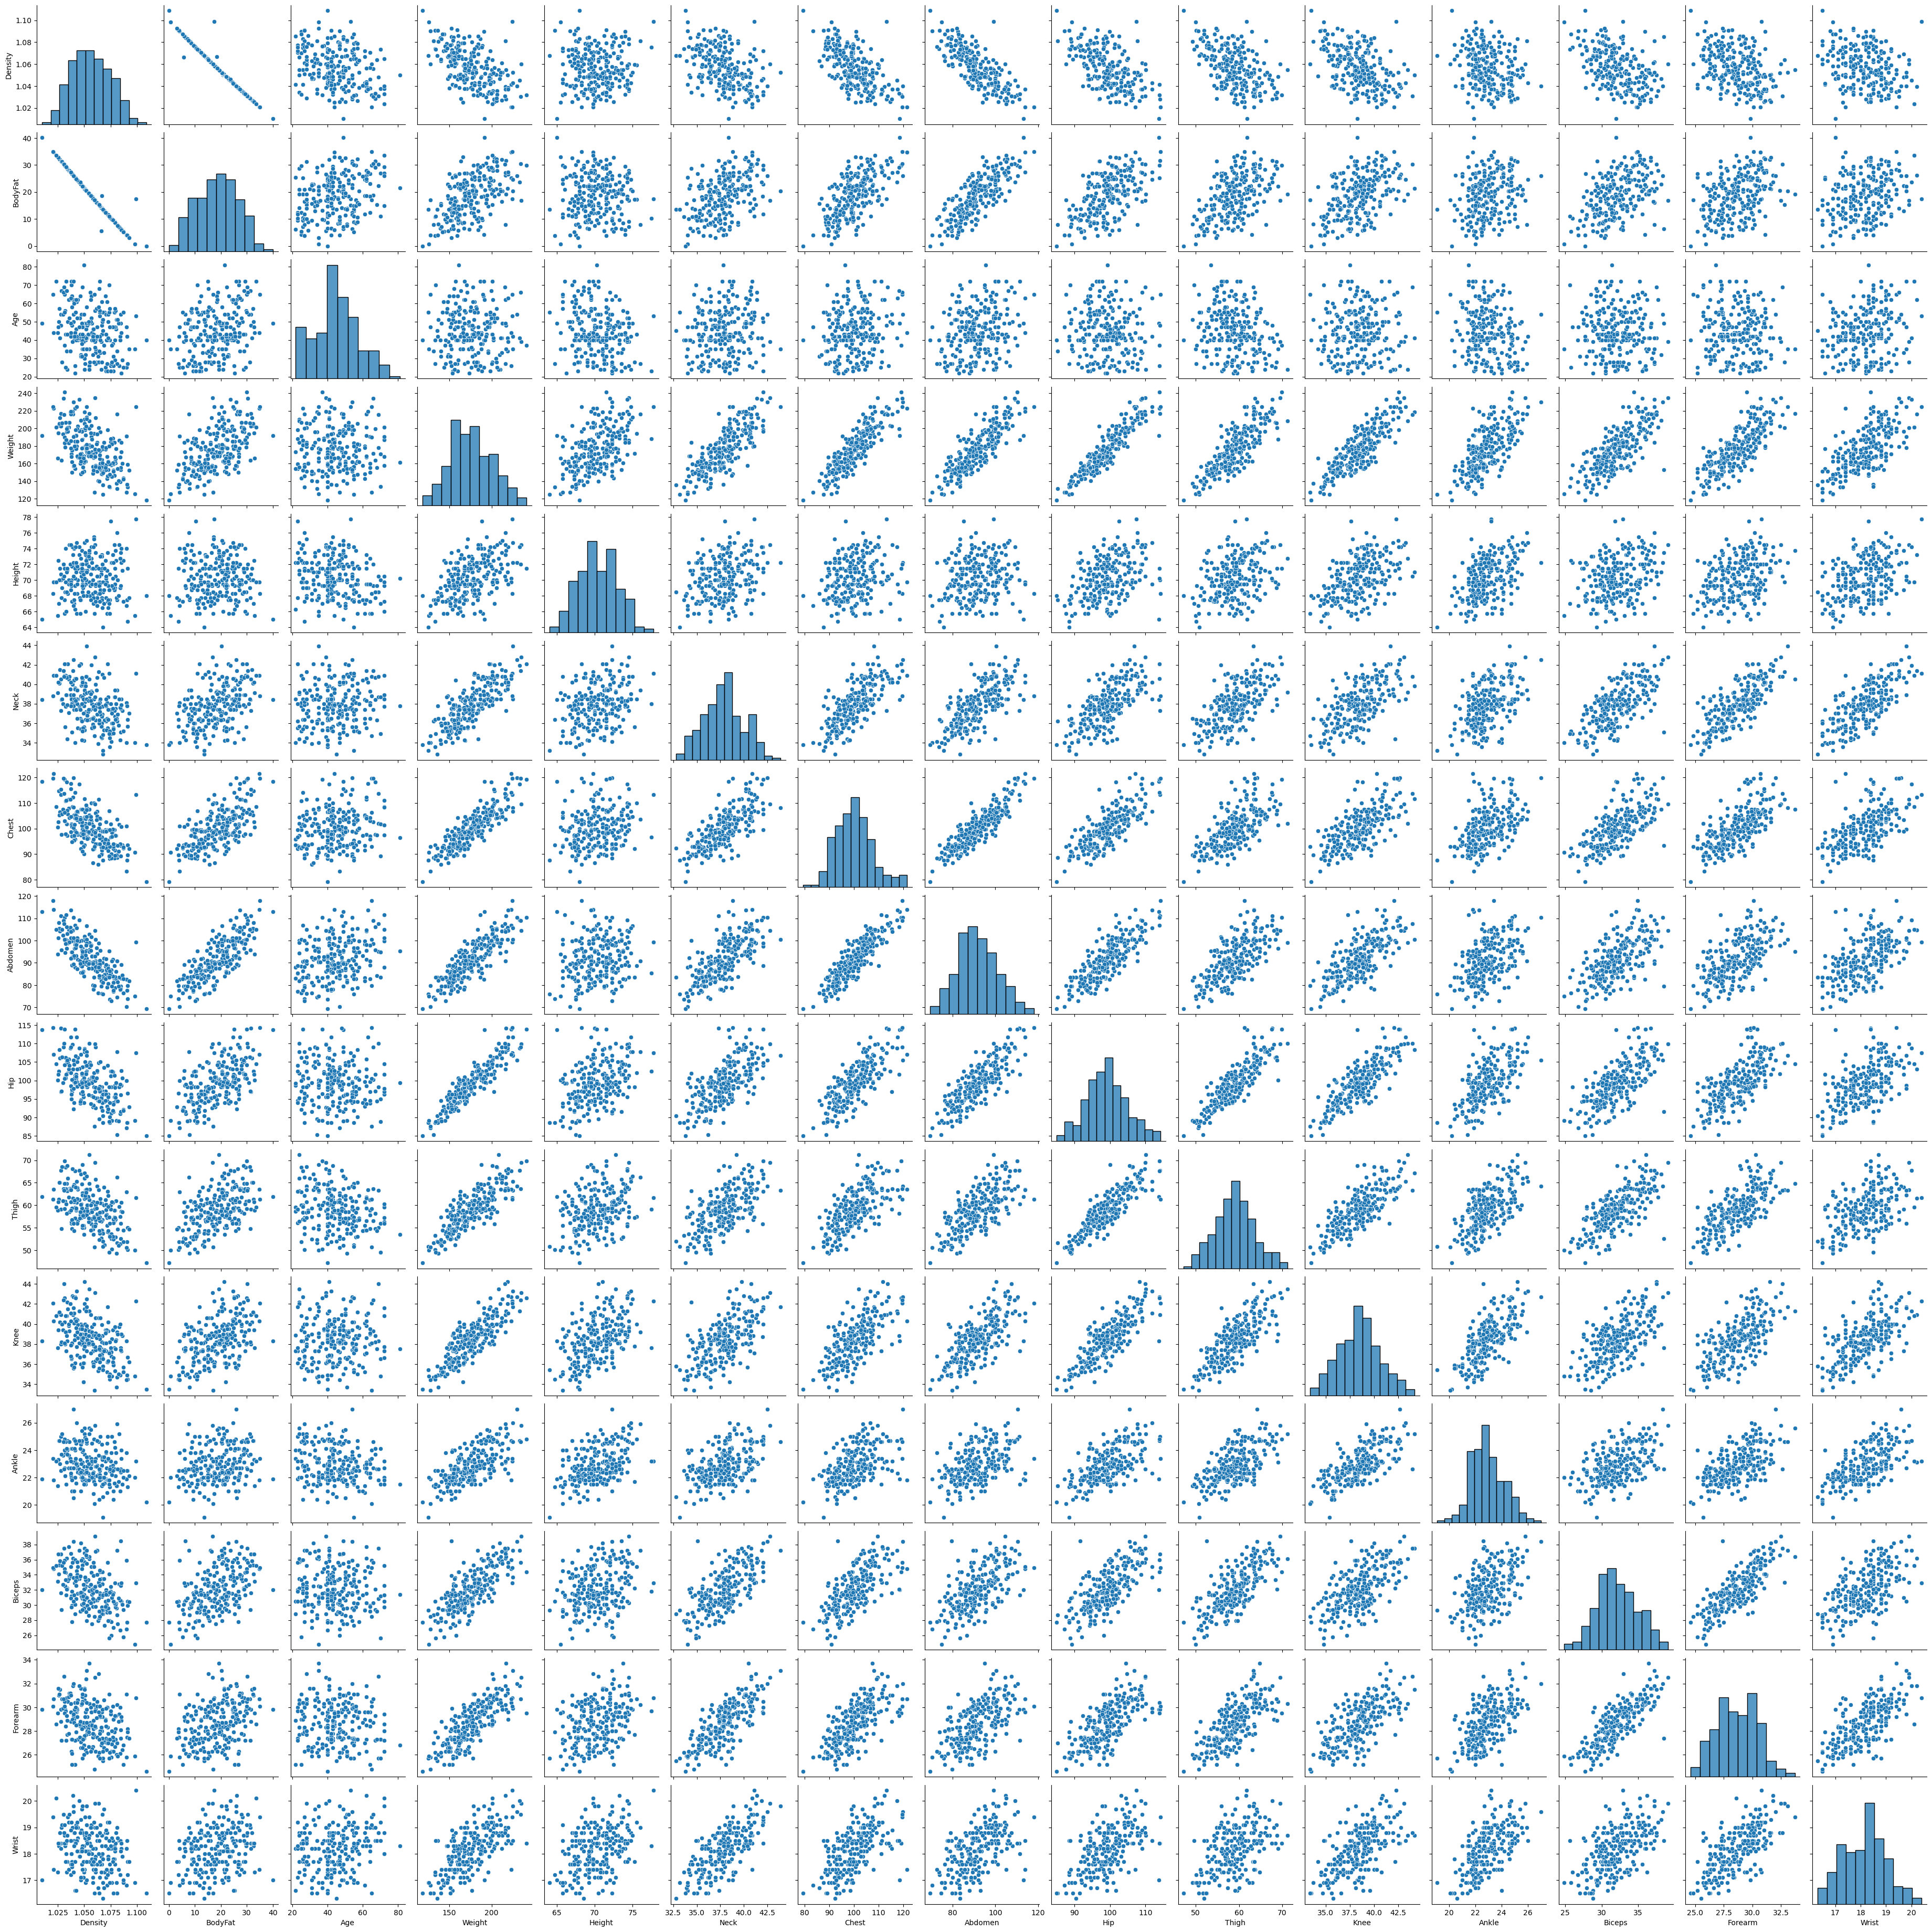

In [51]:
plt.figure(figsize = (40,40))
sns.pairplot(data = data)
plt.show()

In [19]:
X = data.drop(['BodyFat'], axis = 1)
y = data['BodyFat']

print(X.shape)
print(y.shape)

(234, 14)
(234,)


In [20]:
X.head()

,Density,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [21]:
y.head()

0    12.3
1     6.1
2    25.3
3    10.4
4    28.7
Name: BodyFat, dtype: float64

In [22]:
# Scaling the attributes
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(187, 14)
(47, 14)
(187,)
(47,)


In [24]:
# Trying Linear Regression
LR = LinearRegression(fit_intercept = True)
LR.fit(X_train, y_train)
print(LR.coef_)
print(LR.intercept_)
LR_r2_train = r2_score(y_train, LR.predict(X_train))
LR_MSE_train = mean_squared_error(y_train, LR.predict(X_train))

LR_r2_test = r2_score(y_test, LR.predict(X_test))
LR_MSE_test = mean_squared_error(y_test, LR.predict(X_test))

print("\n")
print("Trainig R2 Score for Linear Regression is: ", LR_r2_train)
print("Training Mean Squared Error for Linear Regression is:", LR_MSE_train)
print("\n")
print("Testing R2 score for Linear Regression is:", LR_r2_test)
print("Testing Mean Squared Error for Linear Regression is:", LR_MSE_test)

[-7.22056387  0.13407058  0.36446425  0.02192522  0.01339398  0.20806555
  0.26668563  0.08786141  0.0225926   0.05486768 -0.30583712 -0.1369371
 -0.08319438  0.0398096 ]
18.593175680803586


Trainig R2 Score for Linear Regression is:  0.9705113043596266
Training Mean Squared Error for Linear Regression is: 1.8408351773925504


Testing R2 score for Linear Regression is: 0.9902366135857361
Testing Mean Squared Error for Linear Regression is: 0.5912497312923649


In [26]:
# Trying LASSO Regression
LASSO = Lasso()
LASSO.fit(X_train, y_train)
print(LASSO.coef_)
print(LASSO.intercept_)
print("\n")

LASSO_r2_train = r2_score(y_train, LASSO.predict(X_train))
LASSO_MSE_train = mean_squared_error(y_train, LASSO.predict(X_train))

LASSO_r2_test = r2_score(y_test, LASSO.predict(X_test))
LASSO_MSE_test = mean_squared_error(y_test, LASSO.predict(X_test))

print("\n")
print("Trainig R2 Score for Lasso Regression is: ", LASSO_r2_train)
print("Training Mean Squared Error for Lasso Regression is:", LASSO_MSE_train)
print("\n")
print("Testing R2 score for Lasso Regression is:", LASSO_r2_test)
print("Testing Mean Squared Error for Lasso Regression is:", LASSO_MSE_test)

[-6.62333949  0.          0.          0.          0.          0.
  0.15239524  0.          0.          0.          0.          0.
  0.          0.        ]
18.58240407702602




Trainig R2 Score for Lasso Regression is:  0.9513272543315645
Training Mean Squared Error for Lasso Regression is: 3.038401681085767


Testing R2 score for Lasso Regression is: 0.9708747912656591
Testing Mean Squared Error for Lasso Regression is: 1.7637601450307232


In [27]:
# Trying Ridge Regression
RIDGE = Ridge()
RIDGE.fit(X_train, y_train)

RIDGE_r2_train = r2_score(y_train, RIDGE.predict(X_train))
RIDGE_MSE_train = mean_squared_error(y_train, RIDGE.predict(X_train))

RIDGE_r2_test = r2_score(y_test, RIDGE.predict(X_test))
RIDGE_MSE_test = mean_squared_error(y_test, RIDGE.predict(X_test))

print("\n")
print("Trainig R2 Score for Ridge Regression is: ", RIDGE_r2_train)
print("Training Mean Squared Error for Ridge Regression is:", RIDGE_MSE_train)
print("\n")
print("Testing R2 score for Ridge Regression is:", RIDGE_r2_test)
print("Testing Mean Squared Error for Ridge Regression is:", RIDGE_MSE_test)



Trainig R2 Score for Ridge Regression is:  0.9704398173211354
Training Mean Squared Error for Ridge Regression is: 1.8452977638964507


Testing R2 score for Ridge Regression is: 0.9894152948398679
Testing Mean Squared Error for Ridge Regression is: 0.6409870321832254


In [28]:
# Trying SGD Regressor
sgd = SGDRegressor(penalty = 'elasticnet')
sgd.fit(X_train, y_train)
print(sgd.coef_)
print(sgd.intercept_)

SGD_r2_train = r2_score(y_train, sgd.predict(X_train))
SGD_MSE_train = mean_squared_error(y_train, sgd.predict(X_train))

SGD_r2_test = r2_score(y_test, sgd.predict(X_test))
SGD_MSE_test = mean_squared_error(y_test, sgd.predict(X_test))

print("\n")
print("Trainig R2 Score for SGD Regression is: ", SGD_r2_train)
print("Training Mean Squared Error for SGD Regression is:", SGD_MSE_train)
print("\n")
print("Testing R2 score for SGD Regression is:", SGD_r2_test)
print("Testing Mean Squared Error for SGD Regression is:", SGD_MSE_test)

[-6.95274566  0.11521378  0.0636377   0.0780154   0.0320284   0.08850841
  0.92217676 -0.03396593  0.06113531  0.04331225 -0.19905968 -0.02495698
 -0.08039062 -0.0517569 ]
[18.58734566]


Trainig R2 Score for SGD Regression is:  0.9698402521434168
Training Mean Squared Error for SGD Regression is: 1.8827256882693681


Testing R2 score for SGD Regression is: 0.9873761610309992
Testing Mean Squared Error for SGD Regression is: 0.7644726001416293


In [29]:
# Trying Random Forest Regressor
RFR = RandomForestRegressor(criterion = "absolute_error")
RFR.fit(X_train, y_train)

RFR_r2_train = r2_score(y_train, RFR.predict(X_train))
RFR_MSE_train = mean_squared_error(y_train, RFR.predict(X_train))

RFR_r2_test = r2_score(y_test, RFR.predict(X_test))
RFR_MSE_test = mean_squared_error(y_test, RFR.predict(X_test))

print("\n")
print("Trainig R2 Score for Random Forest Regression is: ", RFR_r2_train)
print("Training Mean Squared Error for Random Forest Regression is:", RFR_MSE_train)
print("\n")
print("Testing R2 score for Random Forest Regression is:", RFR_r2_test)
print("Testing Mean Squared Error for Random Forest Regression is:", RFR_MSE_test)



Trainig R2 Score for Random Forest Regression is:  0.9945615502327636
Training Mean Squared Error for Random Forest Regression is: 0.3394958449197879


Testing R2 score for Random Forest Regression is: 0.9709897521310465
Testing Mean Squared Error for Random Forest Regression is: 1.7567983617021263


In [30]:
# Trying Decision Tree Regressor
tree = DecisionTreeRegressor(criterion = "poisson")
tree.fit(X_train, y_train)

TREE_r2_train = r2_score(y_train, tree.predict(X_train))
TREE_MSE_train = mean_squared_error(y_train, tree.predict(X_train))

TREE_r2_test = r2_score(y_test, tree.predict(X_test))
TREE_MSE_test = mean_squared_error(y_test, tree.predict(X_test))

print("\n")
print("Trainig R2 Score for Decision Tree Regressor is: ", TREE_r2_train)
print("Training Mean Squared Error for Decision Tree Regressor is:", TREE_MSE_train)
print("\n")
print("Testing R2 score for Decision Tree Regressor is:", TREE_r2_test)
print("Testing Mean Squared Error for Decision Tree Regressor is:", TREE_MSE_test)




Trainig R2 Score for Decision Tree Regressor is:  0.9999790122860699
Training Mean Squared Error for Decision Tree Regressor is: 0.0013101604278074864


Testing R2 score for Decision Tree Regressor is: 0.9537105215354749
Testing Mean Squared Error for Decision Tree Regressor is: 2.803191489361701


In [31]:
# Trying Support Vector Regressor
svr = SVR(kernel = 'linear')
svr.fit(X_train, y_train)
# print(svr.coef_)

SVR_r2_train = r2_score(y_train, svr.predict(X_train))
SVR_MSE_train = mean_squared_error(y_train, svr.predict(X_train))

SVR_r2_test = r2_score(y_test, svr.predict(X_test))
SVR_MSE_test = mean_squared_error(y_test, svr.predict(X_test))

print("\n")
print("Trainig R2 Score for SVR is: ", SVR_r2_train)
print("Training Mean Squared Error for SVR is:", SVR_MSE_train)
print("\n")
print("Testing R2 score for SVR is:", SVR_r2_test)
print("Testing Mean Squared Error for SVR is:", SVR_MSE_test)



Trainig R2 Score for SVR is:  0.9652731904107476
Training Mean Squared Error for SVR is: 2.1678250360787916


Testing R2 score for SVR is: 0.993125846331351
Testing Mean Squared Error for SVR is: 0.4162839958391145


In [33]:
# Trying Gradient Boosting Regressor
GBR = GradientBoostingRegressor(loss = 'absolute_error')
GBR.fit(X_train, y_train)

GBR_r2_train = r2_score(y_train, GBR.predict(X_train))
GBR_MSE_train = mean_squared_error(y_train, GBR.predict(X_train))

GBR_r2_test = r2_score(y_test, GBR.predict(X_test))
GBR_MSE_test = mean_squared_error(y_test, GBR.predict(X_test))

print("\n")
print("Trainig R2 Score for Gradient Boosting Regressor is: ", GBR_r2_train)
print("Training Mean Squared Error for Gradient Boosting Regressor is:", GBR_MSE_train)
print("\n")
print("Testing R2 score for Gradient Boosting Resgressor is:", GBR_r2_test)
print("Testing Mean Squared Error for Gradient Boosting Regressor is:", GBR_MSE_test)




Trainig R2 Score for Gradient Boosting Regressor is:  0.9896248896535275
Training Mean Squared Error for Gradient Boosting Regressor is: 0.6476674427392292


Testing R2 score for Gradient Boosting Resgressor is: 0.9906885254597065
Testing Mean Squared Error for Gradient Boosting Regressor is: 0.5638829179024464
